In [132]:
# Load the required packages 
using JuMP, Juniper, ECOS, Ipopt
using CSV, Glob, DataFrames, Statistics
using Plots
using LinearAlgebra

## Compulsory Tasks 

Our first step is to load both the (small) training and testing dataset into the memory. Change the files names according to the group id that you are assigned.

In [133]:
cs_data_train = DataFrame( CSV.File("./ftec-group3-train.csv") );
cs_data_test = DataFrame( CSV.File("./ftec-group3-test.csv") );
cs_data_train = coalesce.(cs_data_train, 0);
cs_data_test = coalesce.(cs_data_test, 0);

The above code should have loaded the training dataset (resp. testing dataset) into the memory and stored them into the variable "cs_data_train" (resp. "cs_data_test") as a DataFrame object. Now, you may execute the following line to inspect what is in the training dataset.

In [134]:
cs_data_train

Row,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,0.17232,0.26181,0.53208,3.1295,46.582,0.41782,0.21531,1.584,1.0995,0.41472,0.21531,0.86174,0.063212,0.21531,340.36,1.0724,3.8196,0.21531,0.048476,0.0,0.9989,0.4029,0.038796,0.52605,0.41472,0.90816,0.99735,2.44,4.1126,0.036673,0.048476,22.575,16.168,1.5389,0.4029,4.4469,65.419,0.42667,0.090711,0.46726,0.018378,0.090711,54.663,54.663,0.0,3.1295,0.0,0.33745,0.075975,2.9866,0.24986,0.06185,1.9018,1.9566,6895.4,0.090482,0.4155,0.90952,0.028821,0.0,6.6773,20.533,17.777,20.368,0
2,-0.060873,0.42219,0.23492,1.7809,-8.538,-0.11088,-0.063943,1.0941,0.9762,0.46192,-0.063943,-0.21256,-0.017425,-0.063943,-5940.2,-0.061446,2.3686,-0.063943,-0.042949,62.938,1.5146,-0.055313,-0.040888,-0.11015,0.46192,-0.054175,-0.36269,0.50599,4.581,0.28063,-0.042949,71.994,5.0698,-0.13101,-0.055313,1.5097,2.2988,0.58329,-0.037153,0.059368,-0.80177,-0.037153,126.96,64.027,-0.23712,0.92753,61.44,-0.093314,-0.062678,1.2689,0.30082,0.19724,0.99494,1.2564,8952.2,-0.024385,-0.13178,1.0244,0.26277,5.7993,5.7008,73.75,4.9492,3.2067,0
3,-0.007617,0.69922,-0.026471,0.85091,-47.297,0.0,-0.007617,0.43016,0.6585,0.30078,0.025148,-0.042897,0.086251,-0.007617,4493.5,0.081228,1.4302,-0.007617,-0.011567,29.909,0.80484,0.025128,-0.011567,-0.022612,-0.096981,0.081228,0.76691,-0.031182,3.9208,1.0495,0.036919,88.097,4.1432,1.0521,-0.077133,0.6585,0.24465,0.69776,-0.11713,0.089449,0.2603,0.038159,74.94,45.031,-0.14115,0.54701,26.773,-0.039286,-0.059659,0.21607,0.17755,0.24136,0.3543,0.82194,-220.58,-0.11713,-0.025323,1.01,1.3199,12.204,8.1055,98.416,3.7087,0.77569,0
4,0.3822,0.2857,0.7143,3.5002,165.23,-0.1767,0.3822,2.5002,1.8504,0.7143,0.42596,1.3378,0.23008,0.3822,244.94,1.4901,3.5002,0.3822,0.20656,9.2607,2.4347,0.42564,0.20656,0.37984,0.22127,1.4901,9.7284,0.0,2.0061,0.15062,0.20656,69.774,5.2311,5.2311,0.35584,1.8504,0.0,0.7143,0.19231,0.029441,0.020298,0.23003,195.6,186.34,8.1411,3.3359,11.466,0.38211,0.20651,3.5002,0.2857,0.19116,0.0,0.0,72.439,0.19231,0.53507,0.80155,0.0,39.414,1.9588,56.356,6.4767,0.0,0
5,0.070237,0.25931,0.066192,1.3717,-28.874,0.070237,0.070237,2.6482,0.95902,0.68669,0.070237,0.39439,0.088422,0.070237,974.35,0.37461,3.8564,0.070237,0.063934,16.087,1.0265,0.068459,0.063934,0.070237,0.68669,0.37461,0.0,0.087588,4.6899,0.23132,0.063934,56.745,6.4323,0.264,0.068459,1.2562,2.4116,0.76791,0.062316,0.63271,0.089399,0.062316,43.725,27.638,1.4506,1.0998,15.428,0.041556,0.037827,0.94205,0.17809,0.15547,0.90866,1.0161,3241.0,-0.042735,0.10228,1.0427,0.11828,22.689,13.207,59.17,6.1687,1.4537,1
6,0.054799,0.38192,0.24421,1.9782,-11.678,0.0,0.054799,1.6183,1.1964,0.61808,0.055541,0.21949,0.081079,0.054799,1437.1,0.25399,2.6183,0.054799,0.045802,82.077,0.90287,0.0001058,0.045802,0.27204,0.3549,0.25399,0.14259,0.4825,5.5087,0.27645,0.10017,94.192,3.8751,2.5331,0.018992,1.1964,0.0,0.61808,0.015874,0.22571,0.30087,8.843e-5,133.47,51.397,0.20368,0.90053,101.5,-0.042101,-0.035189,1.2931,0.24966,0.25806,1.2212,1.2212,78781.0,0.1914,0.08866,0.82869,0.0,4.447,7.1016,76.164,4.7923,2.3639,0
7,0.027554,0.83034,-0.080495,0.89

In [135]:
cs_data_train

Row,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,0.17232,0.26181,0.53208,3.1295,46.582,0.41782,0.21531,1.584,1.0995,0.41472,0.21531,0.86174,0.063212,0.21531,340.36,1.0724,3.8196,0.21531,0.048476,0.0,0.9989,0.4029,0.038796,0.52605,0.41472,0.90816,0.99735,2.44,4.1126,0.036673,0.048476,22.575,16.168,1.5389,0.4029,4.4469,65.419,0.42667,0.090711,0.46726,0.018378,0.090711,54.663,54.663,0.0,3.1295,0.0,0.33745,0.075975,2.9866,0.24986,0.06185,1.9018,1.9566,6895.4,0.090482,0.4155,0.90952,0.028821,0.0,6.6773,20.533,17.777,20.368,0
2,-0.060873,0.42219,0.23492,1.7809,-8.538,-0.11088,-0.063943,1.0941,0.9762,0.46192,-0.063943,-0.21256,-0.017425,-0.063943,-5940.2,-0.061446,2.3686,-0.063943,-0.042949,62.938,1.5146,-0.055313,-0.040888,-0.11015,0.46192,-0.054175,-0.36269,0.50599,4.581,0.28063,-0.042949,71.994,5.0698,-0.13101,-0.055313,1.5097,2.2988,0.58329,-0.037153,0.059368,-0.80177,-0.037153,126.96,64.027,-0.23712,0.92753,61.44,-0.093314,-0.062678,1.2689,0.30082,0.19724,0.99494,1.2564,8952.2,-0.024385,-0.13178,1.0244,0.26277,5.7993,5.7008,73.75,4.9492,3.2067,0
3,-0.007617,0.69922,-0.026471,0.85091,-47.297,0.0,-0.007617,0.43016,0.6585,0.30078,0.025148,-0.042897,0.086251,-0.007617,4493.5,0.081228,1.4302,-0.007617,-0.011567,29.909,0.80484,0.025128,-0.011567,-0.022612,-0.096981,0.081228,0.76691,-0.031182,3.9208,1.0495,0.036919,88.097,4.1432,1.0521,-0.077133,0.6585,0.24465,0.69776,-0.11713,0.089449,0.2603,0.038159,74.94,45.031,-0.14115,0.54701,26.773,-0.039286,-0.059659,0.21607,0.17755,0.24136,0.3543,0.82194,-220.58,-0.11713,-0.025323,1.01,1.3199,12.204,8.1055,98.416,3.7087,0.77569,0
4,0.3822,0.2857,0.7143,3.5002,165.23,-0.1767,0.3822,2.5002,1.8504,0.7143,0.42596,1.3378,0.23008,0.3822,244.94,1.4901,3.5002,0.3822,0.20656,9.2607,2.4347,0.42564,0.20656,0.37984,0.22127,1.4901,9.7284,0.0,2.0061,0.15062,0.20656,69.774,5.2311,5.2311,0.35584,1.8504,0.0,0.7143,0.19231,0.029441,0.020298,0.23003,195.6,186.34,8.1411,3.3359,11.466,0.38211,0.20651,3.5002,0.2857,0.19116,0.0,0.0,72.439,0.19231,0.53507,0.80155,0.0,39.414,1.9588,56.356,6.4767,0.0,0
5,0.070237,0.25931,0.066192,1.3717,-28.874,0.070237,0.070237,2.6482,0.95902,0.68669,0.070237,0.39439,0.088422,0.070237,974.35,0.37461,3.8564,0.070237,0.063934,16.087,1.0265,0.068459,0.063934,0.070237,0.68669,0.37461,0.0,0.087588,4.6899,0.23132,0.063934,56.745,6.4323,0.264,0.068459,1.2562,2.4116,0.76791,0.062316,0.63271,0.089399,0.062316,43.725,27.638,1.4506,1.0998,15.428,0.041556,0.037827,0.94205,0.17809,0.15547,0.90866,1.0161,3241.0,-0.042735,0.10228,1.0427,0.11828,22.689,13.207,59.17,6.1687,1.4537,1
6,0.054799,0.38192,0.24421,1.9782,-11.678,0.0,0.054799,1.6183,1.1964,0.61808,0.055541,0.21949,0.081079,0.054799,1437.1,0.25399,2.6183,0.054799,0.045802,82.077,0.90287,0.0001058,0.045802,0.27204,0.3549,0.25399,0.14259,0.4825,5.5087,0.27645,0.10017,94.192,3.8751,2.5331,0.018992,1.1964,0.0,0.61808,0.015874,0.22571,0.30087,8.843e-5,133.47,51.397,0.20368,0.90053,101.5,-0.042101,-0.035189,1.2931,0.24966,0.25806,1.2212,1.2212,78781.0,0.1914,0.08866,0.82869,0.0,4.447,7.1016,76.164,4.7923,2.3639,0
7,0.027554,0.83034,-0.080495,0.89

The dataset has 20 rows and 65 columns. The first 64 columns ('Attr1' to 'Attr64') are the feature of the companies; the last column ('class') says if the company has gone bankrupt (+1) or not (0).

### **Task 3**: Getting familiar with the dataset

Next, we select a few pairs of features to make scatter plots and observe the pattern.  

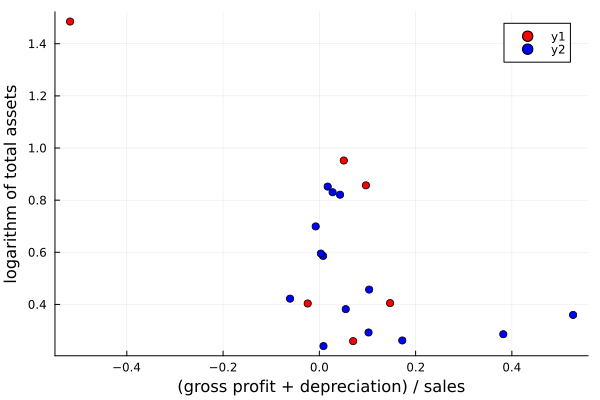

In [136]:
### the following code extracts the columns with specific labels from the dataframe "full_data" and turn 
# the corresponding dataset into a numerical matrix 
feat_vec_plot = Matrix( cs_data_train[!, [ "Attr1", "Attr2" ]] )

# find the indices
pos_idx = findall(cs_data_train.class .== 1);
neg_idx = findall(cs_data_train.class .== 0);

# the scatter plot for the selected features
scatter( feat_vec_plot[pos_idx,1], feat_vec_plot[pos_idx,2] , color="red")
scatter!( feat_vec_plot[neg_idx,1], feat_vec_plot[neg_idx,2] , color="blue", 
    xlabel = "(gross profit + depreciation) / sales", ylabel = "logarithm of total assets") 
    

# note that "xlims", "ylims" controls the range of x/y-axis of the plot 
# "xlabel", "ylabel" controls the labels put on the x/y-axis, you may have to adjust them to produce a readable/nicer figure. 

# the figure can be saved into an png using the following function - please uncomment it and re-run the code
# if you'd like to save a png file.
#savefig("scatter-3.png")

## Task 4: The SOCPs & MIP

We now work on Task 4 for the 3 optimization based formulations for classifiers

In [144]:
# We only use the top d=10 features in the *compulsory task*
d = 10
# The following code retrieves the feature / label for you. Normally you don't need to change it.
feat_vec_train = Matrix( select(cs_data_train, Not(:class)) )[:,1:d]
label_vec_train = 2*cs_data_train.class .- 1;
feat_vec_test = Matrix( select(cs_data_test, Not(:class)) )[:,1:d]
label_vec_test = 2*cs_data_test.class .- 1;

In [145]:
# the following code calculates the l_i weights as specified in Task 4 - you may have to tune the value of "weight" for Task 5
weight =  1;
Li = weight*label_vec_train .+ (weight+1);

m = length(label_vec_train); R0 = 5;
model_socp = Model(ECOS.Optimizer)

# uncomment the following line if you do not want to see debug messages
set_silent(model_socp)

# Program the SOCP formulation (without the sparsity constraint) for Task 4-a below.
@variable( model_socp, w_a[1:d] );
@variable( model_socp, b_a );
@variable( model_socp, z_a );
@variable( model_socp, t_a[1:m] );
# In addition, you may need to define a few more variables below
@constraint( model_socp, [sqrt(R0); w_a] in SecondOrderCone());
@constraint( model_socp, z_a-sum(Li[i] .* t_a[i] for i in 1:m)>=0);
@constraint( model_socp, t_a>=0);
for i in 1:m
    @constraint( model_socp, label_vec_train[i].* dot(feat_vec_train[i,:],w_a) .+ t_a[i] .+ label_vec_train[i] .* b_a .- 1 .>=0);
end

# as well as the constraints, objective function
@objective( model_socp, Min, z_a);
optimize!(model_socp)
value.(z_a)

16.670101201064167

In [146]:
# the following code calculates the l_i weights as specified in Task 4 - you may have to tune the value of "weight" for Task 5
weight = 1.35;
Li = weight*label_vec_train .+ (weight+1);
Sigma = I;
print(weight);

m = length(label_vec_train); R0 = 5; R1 = 2.5;

# Setup the optimizer. Normally you don't have to change this.
model_socp = Model(ECOS.Optimizer)

# uncomment the following line if you do not want to see debug messages
set_silent(model_socp)

# Program the SOCP formulation (without the sparsity constraint) for Task 4-b below.
@variable( model_socp, w_b[1:d] );
@variable( model_socp, b_b );
@variable( model_socp, z_b );
@variable( model_socp, t_b[1:m] );
@variable( model_socp, k_b);
@variable( model_socp, a_b);
@variable( model_socp, v_b[1:d]);

@constraint( model_socp, z_b-sum(Li[i] .* t_b[i] for i in 1:m)>=0);
for i in 1:m
    @constraint( model_socp, label_vec_train[i].* dot(feat_vec_train[i,:],w_b) .+ t_b[i] .+ label_vec_train[i] .* b_b .- 1 .>=0);
end
@constraint( model_socp, t_b>=0);
@constraint( model_socp, [sqrt(R0); w_b] in SecondOrderCone());
@constraint( model_socp, [1+k_b; [2* sqrt(Sigma)* w_b; 1- k_b]] in SecondOrderCone());
@constraint( model_socp, k_b<=R0);
@constraint( model_socp, -1<=k_b);
@constraint( model_socp, -a_b<=b_b);
@constraint( model_socp, b_b<=a_b);
@constraint( model_socp, -w_b <= v_b)
@constraint( model_socp, v_b >= w_b)
@constraint( model_socp, sum(v_b[j] for j in 1:d)+a_b <= R1)

# as well as the constraints, objective function
@objective( model_socp, Min, z_b);
optimize!(model_socp);
value.(z_b)

1.35

21.10577467650147

In [147]:
# the following code calculates the l_i weights as specified in Task 4 - you may have to tune the value of "weight" for Task 5
weight = 0.565
Li = weight*label_vec_train .+ (weight+1);
Sigma = I;
R0 = 5; R1 = 10; S = 2;
 
# Setup the optimizer. Normally you don't have to change this.
nl_solver = optimizer_with_attributes(Ipopt.Optimizer, "print_level"=>0)
optimizer = Juniper.Optimizer
model_ip = Model(optimizer_with_attributes(optimizer, "nl_solver"=>nl_solver, "atol"=>1e-5)) 
# in case the program takes too long to run, make "atol" bigger

# uncomment the following line if you don't want to see the long debug messages
set_silent(model_ip)

# Program the MIP formulation below as required by Task 4-c.
@variable(model_ip, w_mip[1:d] );
@variable(model_ip, b_mip );
@variable(model_ip, z_mip );
@variable(model_ip, t_mip[1:m] );
@variable(model_ip, n_mip[1:d], Bin);
c_mip = zeros(d);
# In addition, you may need to define a few more variables below
@constraint( model_ip, z_mip-sum(Li[i] .* t_mip[i] for i in 1:m)>=0);
for i in 1:m
    @constraint( model_ip, label_vec_train[i].* dot(feat_vec_train[i,:],w_mip) .+ t_mip[i] .+ label_vec_train[i] .* b_mip .- 1 .>=0);
end
@constraint( model_ip, -1*t_mip<=0);
@constraint( model_ip, dot(transpose(w_mip),w_mip)-R0<=0);
@constraint( model_ip, transpose(w_mip)*Sigma*w_mip+ transpose(c_mip)*w_mip <= R0)
@constraint( model_ip, -1 .* R1 .* n_mip <= w_mip)
@constraint( model_ip, w_mip <= R1 .*n_mip)
@constraint( model_ip, sum(n_mip[i] for i in 1:d) <= S)
# as well as the constraints, objective function
@objective( model_ip, Min, z_mip);
optimize!(model_ip)
value.(z_mip)

18.34370767355592

The following helper code would help you to visualize the "w, b" found by the above formulations

In [154]:
w_socp_a = JuMP.value.(w_a); b_socp_a = JuMP.value.(b_a);
w_socp_b = JuMP.value.(w_b); b_socp_b = JuMP.value.(b_b);
w_mip_mip = JuMP.value.(w_mip); b_mip_mip = JuMP.value.(b_mip);

# we will plot a normalized version of the classifiers below
plot(1:d, w_socp_a./norm(w_socp_a), label = "SOCP - Task 4a" );
plot!(1:d, w_socp_b./norm(w_socp_b), label = "SOCP - Task 4b" )
plot!(1:d, w_mip_mip./norm(w_mip_mip), label = "MIP - Task 4c" )

savefig("plot-classifier-weight.png")
# use savefig to produce a high quality plot in png format.

"/Users/lmf/Downloads/Project/ftec-project-files/plot-classifier-weight.png"

In [149]:
function fine_error_rate(feat_vec, label_vec, w, b)
    # write your function to calculate the false alarm & missed detection rate
    no_non_neg = 0
    no_non_pos = 0
    no_pos = 0
    no_neg = 0
    distance = 0
    for i in 1:length(label_vec)
        distance = dot(feat_vec[i, :], w) + b
        
        if distance >= 0
            tmp = 1
        else
            tmp = -1
        end

        if label_vec[i] == -1
            no_neg += 1

        else
            no_pos += 1
        end
        
        if tmp == +1 && tmp != label_vec[i]
            no_non_neg +=1
        end
        
        if tmp == -1 && tmp != label_vec[i]
            no_non_pos += 1
        end
        
    end
    fa_rate = no_non_neg / no_neg
    md_rate = no_non_pos / no_pos

    return fa_rate, md_rate
end

fine_error_rate (generic function with 1 method)

In [150]:
# the following code should calculate the testing & training error for each classifier
print( "Training FA/MD rate of SOCP Task 4a = ", fine_error_rate( feat_vec_train, label_vec_train, w_socp_a, b_socp_a ), "\n" )
print( "Test FA/MD rate of SOCP Task 4a = ", fine_error_rate( feat_vec_test, label_vec_test, w_socp_a, b_socp_a ), "\n" )

print( "Training FA/MD rate of SOCP Task 4b = ", fine_error_rate( feat_vec_train, label_vec_train, w_socp_b, b_socp_b ), "\n" )
print( "Test FA/MD rate of SOCP Task 4b = ", fine_error_rate( feat_vec_test, label_vec_test, w_socp_b, b_socp_b ), "\n" )

print( "Training FA/MD rate of MIP Task 4c = ", fine_error_rate( feat_vec_train, label_vec_train, w_mip_mip, b_mip_mip ), "\n" )
print( "Test FA/MD rate of MIP Task 4c = ", fine_error_rate( feat_vec_test, label_vec_test, w_mip_mip, b_mip_mip ), "\n" )

Training FA/MD rate of SOCP Task 4a = (0.0, 0.3333333333333333)
Test FA/MD rate of SOCP Task 4a = (0.46, 0.4)
Training FA/MD rate of SOCP Task 4b = (0.42857142857142855, 0.3333333333333333)
Test FA/MD rate of SOCP Task 4b = (0.72, 0.3)
Training FA/MD rate of MIP Task 4c = (0.07142857142857142, 0.5)
Test FA/MD rate of MIP Task 4c = (0.04, 0.7)


To fine tune the "weight" parameter, you may need to go back to Task 4 and re-run the program again until you find the right combinations. 

### Task 5c - Scatter Plot for the Classifier

Identify the two MOST significant features found by the MIP Formulation after fine-tuning, and plot the scatter plot below:

In [153]:
selected_feat = [3,9] # select *two* indices out of d=10 attributes according to your MIP solution. 
# If the MIP solution chose only *one* attribute, you may select the other one randomly.

feat_vec = feat_vec_train[:, selected_feat] 

# find the indices 
pos_idx = findall(cs_data_train.class .== 1);
neg_idx = findall(cs_data_train.class .== 0);

# the following two fines are almost identical to Task 4
scatter( feat_vec[pos_idx,1], feat_vec[pos_idx,2] , color="red" )
scatter!( feat_vec[neg_idx,1], feat_vec[neg_idx,2] , color="blue" , 
    xlabel = "Attribute 3", ylabel = "Attribute 9" )
# to avoid confusion, make sure to change the labels `Attr1', `Attr2' to the ones you've selected

# Note: In the following we shall IGNORE every other feature other those that have been selected

# Write the code to plot the classifiers below, to create an array of values from -2 to 8 with an equal spacing
# of 0.2, you may use the following code:
x_range = collect(-2:0.2:8)
# depending on the attributes selected - you may need to select different "x_range" to make the scatter plot looks "nice"
socp_a(x_range) = (-w_socp_a[3] .* x_range .- b_socp_a) / w_socp_a[9]
socp_b(x_range) = (-w_socp_b[3] .* x_range .- b_socp_b) / w_socp_b[9]
mip_(x_range) = (-w_mip_mip[3] .* x_range .- b_mip_mip) / w_mip_mip[9]

plot!(x_range, socp_a(x_range), label = "SOCP - Task 4a")
plot!(x_range, socp_b(x_range), label = "SOCP - Task 4b")
plot!(x_range, mip_(x_range), label = "MIP - Task 4c")


xlims!((-2,2.5))
ylims!((-1,5))

# if you want to have some controls over the range of the 2d-plane plotted, you can change the (-1,1) values 
# and uncomment the above lines about xlims, ylims

savefig("scatter-4.png")

"/Users/lmf/Downloads/Project/ftec-project-files/scatter-4.png"

## Task 6: Competitive Task

As the last part of this project, we will build a customized solver for designing the binary classifier using a large number of training samples (around 8k of them).

We first prepare the data by loading them into the memory. 

In [157]:
cs_data_full = DataFrame( CSV.File( "./full_data_train.csv" ) );
# create a matrix of the full data
feat_vec_all_full = Matrix( cs_data_full )[:,1:64];
feat_vec_all_full = coalesce.(feat_vec_all_full, 0);
label_vec_all_full = 2 .* cs_data_full.class .- 1;
m = length( label_vec_all_full );

cs_data_test = DataFrame( CSV.File( "./full_data_test.csv" ) );
feat_vec_all_full_test = Matrix( cs_data_test )[:,1:64];
feat_vec_all_full_test = coalesce.(feat_vec_all_full_test, 0);
label_vec_all_full_test = 2 .* cs_data_test.class .- 1;

In [158]:
# this is a provided function for calculating the F1 score
function f1_score( fa, md )
    return 2*(1-md) / ( 2*(1-md) + fa + md )
end
function no_of_nonzeros( w, b )
    vec_normalize = [w;b] / norm( [w;b] );
    return sum( abs.(vec_normalize) .>= 0.01 )
end

no_of_nonzeros (generic function with 1 method)

In [159]:
# instead of the built in "exp" function, it is typically more numerically stable to use the following "exp_limit"
function exp_limit( x )
    return exp( min(x,500.0) )
end

function logistic_loss( feat_vec, label_vec, w, b, L )
    return 1 ./ m .* sum(L[i].*log(1 .+exp_limit(.-label_vec[i] .* (dot(feat_vec[i,:] , w) .+ b ))) for i in 1:m)
end

function logistic_grad(feat_vec, label_vec, w, b, L)
    grad = zeros(size(w))
    grad_b = 0
    for i in 1:m
        z = dot(feat_vec[i,:], w) + b
        z = exp_limit(-label_vec[i] * z)
        grad -= (label_vec[i] * L[i] * feat_vec[i,:] * z) / (1 + z)/m
        grad_b -= L[i]*z/(1+z)/label_vec[i]/m 
    end
    return grad, grad_b
end


function projection_X( w, R )
    u = abs.(w)
    v = sort(u, rev=true)
    w_hat = zeros(64)
    j_sv = 0
    for j in 1:64
        if v[j]-1/j*(sum(v[r] for r in 1:j)-R)<=0
            j_sv = j-1
            break
        end
    end
    if j_sv == 0
        theta = 0
    else
        theta = 1/j_sv * (sum(v[r] for r in 1:j_sv)-R)
    end
    for i in 1:64
        w_hat[i] = sign(w[i])*max(0,(abs.(w[i])-theta))
    end
    return w_hat
end

projection_X (generic function with 1 method)

In [160]:
# create the weight vector - you are not required to use it
weight = 1.9
Li = weight*label_vec_all_full .+ (weight+1);
step=0.94
R=0.5
# gradient descent
w0_log = zeros(64); b0_log = 0;
max_iter = 5000; 

w_log = copy(w0_log); b_log = copy(b0_log);
store_obj = [];
obj_val = 0;

# record the initial objective value
push!( store_obj, obj_val )
for iter = 1 : max_iter
    # write your projected GD / other algorithm
    grad, grad_b = logistic_grad( feat_vec_all_full, label_vec_all_full, w_log, b_log, Li)
    w_log -= step*grad
    b_log -= step*grad_b
    
    w_log = projection_X(w_log, R) #gradient, R
    # record the correct objective value
    obj_val = logistic_loss( feat_vec_all_full, label_vec_all_full, w_log, b_log, Li)
    
    push!( store_obj, obj_val ) 
    
    if mod(iter, 500) == 0
        print( "obj = ", obj_val , "\n")
    end
end

obj = 1.1674185844774212
obj = 1.1674185844774212
obj = 1.1674185844774212
obj = 1.1674185844774212
obj = 1.1674185844774212
obj = 1.1674185844774212
obj = 1.1674185844774212
obj = 1.1674185844774212
obj = 1.1674185844774212
obj = 1.1674185844774212


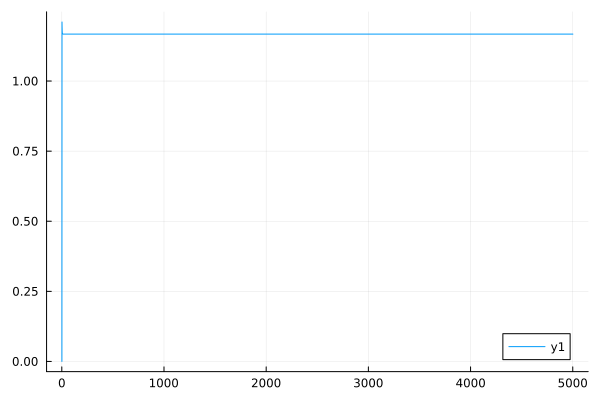

In [162]:
# if you have stored your objective values in the array "store_obj", this should be helpful
plot(store_obj)

In [163]:
fa_train,md_train = fine_error_rate( feat_vec_all_full, label_vec_all_full, w_log , b_log )
fa_test,md_test = fine_error_rate( feat_vec_all_full_test, label_vec_all_full_test, w_log , b_log )

print( "train F1 = ", f1_score( fa_train,md_train  ), "\n", 
   " test F1 = ", f1_score( fa_test,md_test ), "\n", 
    " no of non-zeros = ", no_of_nonzeros( w_log, b_log ) )

train F1 = 0.6800247615401398
 test F1 = 0.6740557306186451
 no of non-zeros = 2